# A spatial map of the separation of particles after a certain amount of time

*Author: Miriam Sterl*

In [1]:
from netCDF4 import Dataset
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker

In [ ]:
File1 = '/science/projects/oceanparcels/output_data/data_Miriam/Results_TrackingGC.nc'
dataset1 = Dataset(File1)
lat1 = dataset1.variables['lat'][:]
lon1 = dataset1.variables['lon'][:]
time1 = dataset1.variables['time'][:]
dist1 = dataset1.variables['distance'][:]
lon1[lon1>180]-=360
lon1[lon1<-180]+=360

File2 = '/science/projects/oceanparcels/output_data/data_Miriam/Results_TrackingGCFES.nc'
dataset2 = Dataset(File2)
lat2 = dataset2.variables['lat'][:]
lon2 = dataset2.variables['lon'][:]
time2 = dataset2.variables['time'][:]
dist2 = dataset2.variables['distance'][:]
lon2[lon2>180]-=360
lon2[lon2<-180]+=360

File3 = '/science/projects/oceanparcels/output_data/data_Miriam/Results_TrackingGCFES30.nc'
dataset3 = Dataset(File3)
lat3 = dataset3.variables['lat'][:]
lon3 = dataset3.variables['lon'][:]
time3 = dataset3.variables['time'][:]
dist3 = dataset3.variables['distance'][:]
lon3[lon3>180]-=360
lon3[lon3<-180]+=360

In [9]:
titles = ['(a) Tides for 13 years, after 3 months', '(b) Tides for 13 years, after 1 year', 
          '(c) Tides for 13 years, after 13 years', '(d) Tides for 30 days, after 3 months',
          '(e) Tides for 30 days, after 1 year', '(f) Tides for 30 days, after 13 years']

In [10]:
def SeparationPlot(lons, lats, sep, fig, ax, vmax, titlenr, titlesize, labelnr, labelsize, colormap):
    """
    Function that plots the total distance travelled by particles during a certain period as a function of their initial position
    """  
    minLat = np.min(np.round(lats)) # the minimal (rounded) latitude
    maxLat = np.max(np.round(lats)) # the maximal (rounded) latitude
    minLon = np.min(np.round(lons)) # the minimal (rounded) longitude
    maxLon = np.max(np.round(lons)) # the maximal (rounded) longitude

    allLats = np.arange(minLat, maxLat+1) # the latitudinal grid
    allLons = np.arange(minLon, maxLon+1) # the longitudinal grid
    
    separations = np.zeros((len(allLons), len(allLats)))
    for i in range(len(sep)):
        separations[int(np.round(lons[i]-minLon)), int(np.round(lats[i]-minLat))] = sep[i]
            # shift by minLon, minLat to get positive indices
    maskedSep = np.ma.masked_where(separations==0.0, separations) # mask land points
    
    Lat, Lon = np.meshgrid(allLats, allLons)
    sepplot = ax.pcolormesh(Lon, Lat, maskedSep/(1e3), cmap = colormap, vmin=0, vmax=vmax)
    ax.set_title(titles[titlenr], fontsize=titlesize,fontweight='bold')
    ax.coastlines()
    ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black', facecolor=(0.6,0.6,0.6))
    ax.set_xticks([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180], crs=ccrs.PlateCarree())
    ax.set_xticklabels([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180], fontsize=labelsize)
    ax.set_yticks([-90, -60, - 30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    ax.set_yticklabels([-90, -60, - 30, 0, 30, 60, 90], fontsize=labelsize)
    lon_formatter = cticker.LongitudeFormatter()
    lat_formatter = cticker.LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.grid(linewidth=2, color='black', alpha=0.25, linestyle=':')
    cbar = fig.colorbar(sepplot, ax=ax, shrink=0.7, extend='max', pad=0.02)
    cbar.set_label('Separation ($10^3$ km)', rotation=90, fontsize=labelsize+2)
    cbar.ax.tick_params(labelsize=labelsize)
    
    return sepplot

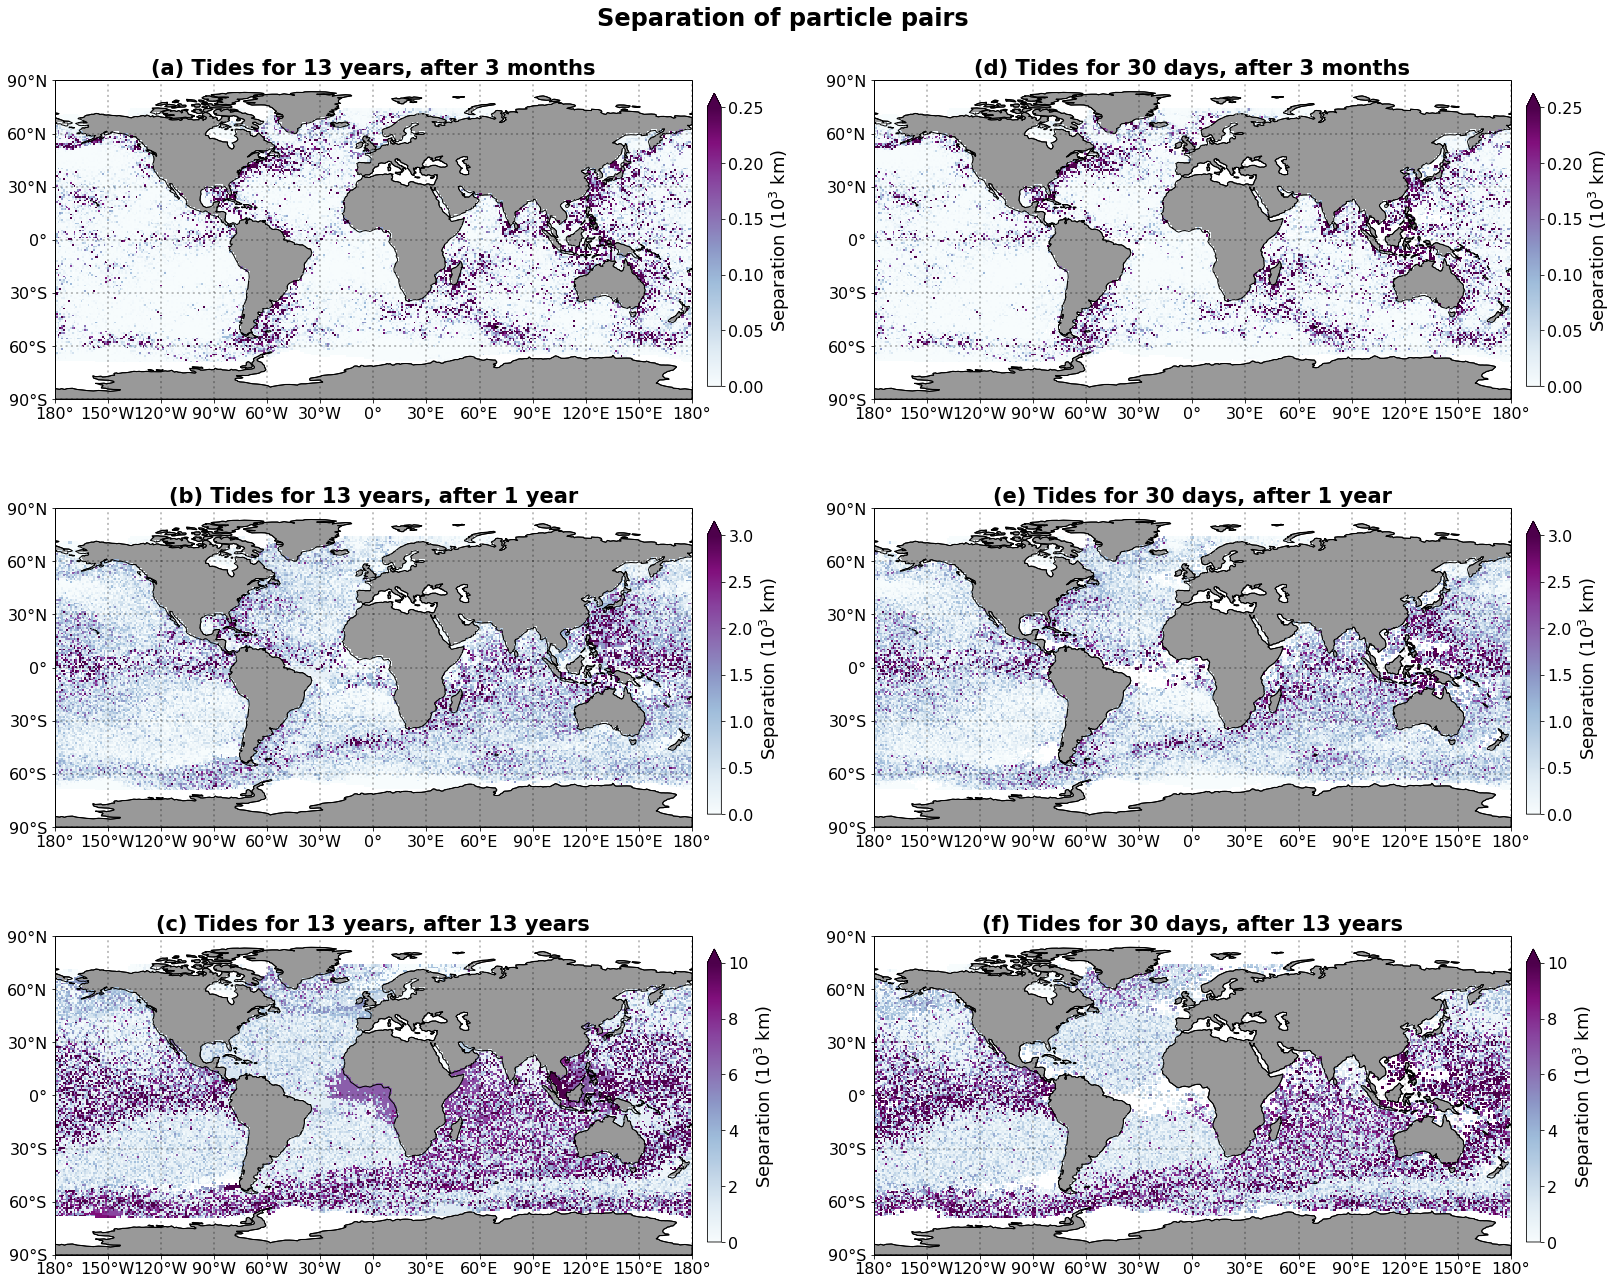

In [11]:
fig, ((ax1, ax4), (ax2, ax5), (ax3, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(23,18), subplot_kw={'projection': ccrs.PlateCarree()})
l = 16
t = 21
colormap = 'BuPu'
sepplot1 = SeparationPlot(startLons, startLats, sep1, fig, ax1, 
                         vmax=0.25, titlenr = 0, titlesize=t, labelnr = 1, labelsize=l, colormap=colormap)
sepplot2 = SeparationPlot(startLons, startLats, sep2, fig, ax2, 
                         vmax=3, titlenr = 1, titlesize=t, labelnr = 1, labelsize=l, colormap=colormap)
sepplot3 = SeparationPlot(startLons, startLats, sep3, fig, ax3, 
                         vmax=10, titlenr = 2, titlesize=t, labelnr = 1, labelsize=l, colormap=colormap)
sepplot4 = SeparationPlot(startLons, startLats, sep4, fig, ax4, 
                         vmax=0.25, titlenr = 3, titlesize=t, labelnr = 1, labelsize=l, colormap=colormap)
sepplot5 = SeparationPlot(startLons, startLats, sep5, fig, ax5, 
                         vmax=3, titlenr = 4, titlesize=t, labelnr = 1, labelsize=l, colormap=colormap)
sepplot6 = SeparationPlot(startLons, startLats, sep6, fig, ax6, 
                         vmax=10, titlenr = 5, titlesize=t, labelnr = 1, labelsize=l, colormap=colormap)
fig.suptitle('Separation of particle pairs', x=0.475,y=1.01, fontsize=24,fontweight='bold')
plt.tight_layout()
#plt.savefig('SeparationSpatial', bbox_inches='tight')